# Guided Problems - Unsupervised Learning (with Solutions)

### The Dataset

We will be using the commonly reference Airbnb dataset. This dataset consists of different attributes for Airbnb listings.

In [89]:
# importing different dependencies 

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

### Part 1: EDA

Try loading the Airbnb data ("airbnb.csv") and let's play around with it to see what variables might be interesting to explore.

In [3]:
# importing the data

airbnb = pd.read_csv('airbnb.csv')

C:\Users\muammar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
airbnb.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode
0,1,1.0,Real Bed,1,1,flexible,SF,True,8/15/2016,t,...,t,1/18/2017,37.773742,-122.391503,Mission Bay,5,Apartment,95,Private room,95202\r\r\r\r\r\r\r
1,1,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.135680,-118.400691,Studio City,6,House,100,Private room,91604-3646
2,2,1.0,Real Bed,1,1,moderate,LA,True,11/16/2011,t,...,f,4/8/2017,34.192617,-118.136794,Altadena,136,Apartment,96,Entire home/apt,91001-2243
3,2,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.023618,-118.501174,Santa Monica,0,Apartment,96,Private room,90403-2638
4,2,1.0,Real Bed,1,1,moderate,LA,True,9/6/2010,t,...,f,2/28/2017,34.104213,-118.260040,Silver Lake,16,House,99,Private room,90039-2715


#### Questions: 
1. How many total listing are present in the data?
2. What are the different variables in the data?
3. What data types are present within the data?
4. What is the average number of reviews for a listing?
5. What is the average review score for a listing?

In [8]:
# Q1

print(len(airbnb))

99569


In [9]:
# Q2

print(airbnb.columns)

Index(['accommodates', 'bathrooms', 'bed_type', 'bedrooms', 'beds',
       'cancellation_policy', 'city', 'cleaning_fee', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'neighbourhood', 'number_of_reviews', 'property_type',
       'review_scores_rating', 'room_type', 'zipcode'],
      dtype='object')


In [10]:
# Q3

airbnb.dtypes

accommodates                int64
bathrooms                 float64
bed_type                   object
bedrooms                    int64
beds                        int64
cancellation_policy        object
city                       object
cleaning_fee                 bool
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate          int64
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating        int64
room_type                  object
zipcode                    object
dtype: object

In [13]:
# Q4

print(airbnb['number_of_reviews'].mean())

20.88419086261788

In [14]:
# Q5

print(airbnb['review_scores_rating'].mean())

94.49183982966586


#### Data Visualizations

The 'number_of_reviews' variable and the 'review_scores_rating' variable are pretty interesting. Let's plot the two variables and see if we can see any distinct clusters. 

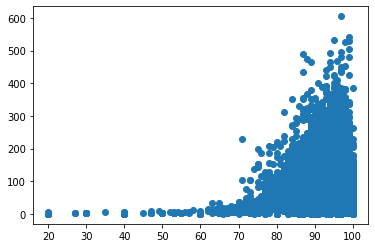

In [32]:
plt.scatter(airbnb['review_scores_rating'], airbnb['number_of_reviews'])

K Means clustering can help us easily see clusters in the data by using Euclidean Distance to calculate similarity between observations. 
Question: Can you plot the results for K Means clustering to show 2 clusters for the data based on the number of reviews and the review scores rating?

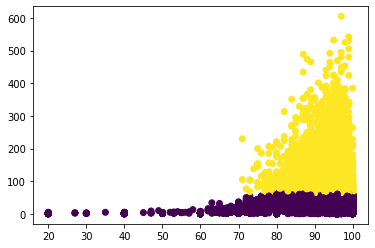

In [33]:
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(airbnb[['number_of_reviews', 'review_scores_rating']])
plt.scatter(airbnb['review_scores_rating'], airbnb['number_of_reviews'], c = kmeans1.labels_)
plt.show()

## Part 2: Airbnb Listing Similarity

We saw a great way to cluster two variables in the Airbnb dataset using K Means clustering. What happens when we try to find Airbnb listings that are "similar" to each other. It turns into a clustering problem, but now we are examing more than just 2 variables. We can take into account categorical variables and numerical variables, but for simplicity in this example let's focus on the numerical variables. 

#### Questions:
1. Which variables in the dataset are numerical variables
2. Can you cluster the data based on all of the numerical variables for 2 clusters? Show an example of two listings that were determined to be "similar" to each other based on these 2 clusters.
3. What is the optimal number of clusters? (hint: elbow method)
4. After clustering based on the optimal number of clusters - which cluster contains the most listings? Which one contains the least listings?
5. Given a new listing, can you show similar listings to it? (code to generate random listing is below)
6. What are some applications of clustering with your client work? Ex. customer segmentation, spam filtering, anomaly detection

In [171]:
# Random listing generator
l = random.randint(0, len(airbnb))

test_listing = airbnb[l-1:l][numerical_vars].reset_index(drop=True)
for i in numerical_vars:
    if i not in ['latitude', 'longitude']:
        test_listing[i][0] = random.randint(1, round(airbnb[i].max()))


C:\Users\muammar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [52]:
# Q1

numerical_vars = [i for i in airbnb.columns if airbnb[i].dtypes not in ['object', 'bool']]
numerical_vars

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'host_response_rate',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating']

In [57]:
# Q2

kmeans2 = KMeans(n_clusters = 2, random_state = 17).fit(airbnb[numerical_vars])

airbnb['cluster assignment'] = kmeans2.labels_

airbnb[airbnb['cluster assignment'] == 1].head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,cluster assignment
2,2,1.0,Real Bed,1,1,moderate,LA,True,11/16/2011,t,...,4/8/2017,34.192617,-118.136794,Altadena,136,Apartment,96,Entire home/apt,91001-2243,1
5,2,1.0,Real Bed,1,1,strict,LA,True,2/2/2014,t,...,4/27/2017,34.077669,-118.349899,Mid-Wilshire,146,House,98,Private room,90036-2514,1
7,2,1.0,Real Bed,1,1,strict,LA,True,6/1/2009,t,...,5/1/2017,34.034752,-118.377514,Williamsburg,127,Apartment,93,Entire home/apt,90034-2203,1
9,2,1.0,Futon,1,1,moderate,Chicago,False,10/1/2014,t,...,4/16/2017,41.996729,-87.662595,Edgewater,119,Apartment,99,Private room,60660-1448,1
12,2,1.0,Real Bed,1,1,strict,NYC,True,7/15/2015,t,...,9/29/2017,40.765827,-73.910856,Astoria,66,Apartment,99,Private room,11103-3233,1


In [ ]:
# Q3

SSD = {}
for k in range(1, 16):
    
    kmeans = KMeans(n_clusters = k, random_state = 17).fit(airbnb[numerical_vars])
    SSD[k] = kmeans.inertia_ 
    

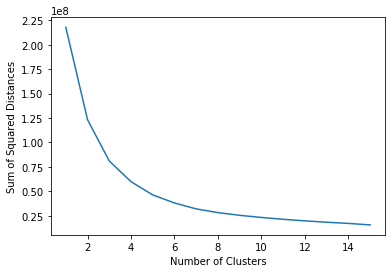

In [61]:
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.plot(list(SSD.keys()), list(SSD.values()))
plt.show()

In [83]:
# Q4

kmeans4 = KMeans(n_clusters = 4, random_state = 17).fit(airbnb[numerical_vars])
airbnb['clustering assignments k=4'] = kmeans4.labels_
for i in range(0, 4):
    print(f'Cluster {i}:', len(airbnb[airbnb['clustering assignments k=4'] == i])/len(airbnb)*100)

Cluster 0: 11.572879108959617
Cluster 1: 52.590665769466405
Cluster 2: 33.31358153642198
Cluster 3: 2.522873585152005


In [172]:
# Q5

kmeans4.predict(test_listing)

array([3])

## Additional Resources

Sklearn Documentation:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Articles on Clustering:
https://datafloq.com/read/7-innovative-uses-of-clustering-algorithms/6224
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
https://machinelearningmastery.com/clustering-algorithms-with-python/

Youtube Tutorials:
https://www.youtube.com/watch?v=1XqG0kaJVHY
https://www.youtube.com/watch?v=EItlUEPCIzM